In [68]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 

In [69]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [70]:
x_train.shape

(60000, 28, 28)

In [71]:
x_test.shape

(10000, 28, 28)

In [72]:
y_train.shape

(60000,)

In [73]:
y_test.shape

(10000,)

image

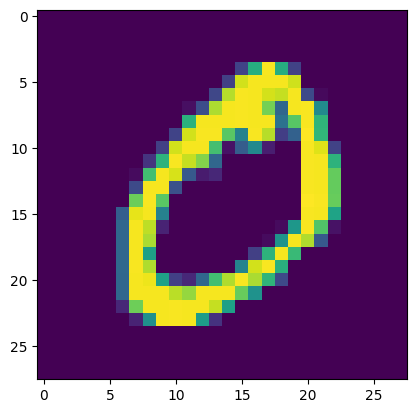

In [74]:
plt.imshow(x_train[1])

image normalization(value between 0 to 1)

In [75]:
def normalize(image):
    image=tf.cast(image/255.,tf.float32)
    return image
x_train=normalize(x_train)
x_test=normalize(x_test)

In [76]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [77]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
Total params: 25818 (100.85 KB)
Trainable params: 25818 (100.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
earlystop=EarlyStopping()

In [79]:
# model compilation
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model training

In [101]:
history=model.fit(x_train,y_train, epochs=20, validation_split=.2,verbose=1)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0678 - accuracy: 0.9786 - val_loss: 0.1323 - val_accuracy: 0.9642
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0638 - accuracy: 0.9802 - val_loss: 0.1264 - val_accuracy: 0.9655
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.1375 - val_accuracy: 0.9635
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.1296 - val_accuracy: 0.9656
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0505 - accuracy: 0.9838 - val_loss: 0.1353 - val_accuracy: 0.9654
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.1397 - val_accuracy: 0.9635
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0461 - accuracy: 0.9848 - val_loss: 0.1421 - val_accuracy:

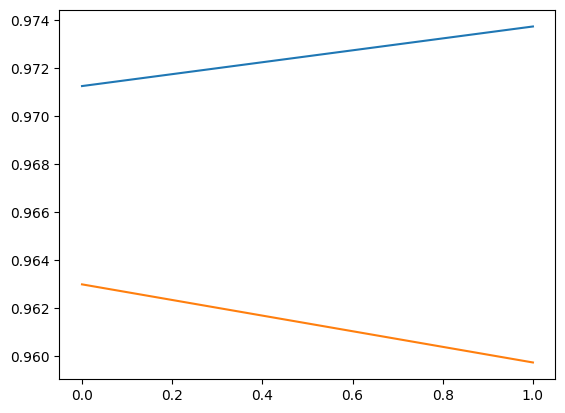

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

predicting the probabilty of image be a number

In [96]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


storing result

In [97]:
y_pred=y_prob.argmax(axis=1)

In [98]:
y_prob[0]

array([1.3812404e-07, 2.9273349e-06, 1.8777605e-04, 3.6138559e-03,
       6.8658823e-10, 4.6542435e-04, 2.0856839e-11, 9.9554932e-01,
       1.0454097e-05, 1.7018453e-04], dtype=float32)

accuracy

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9608

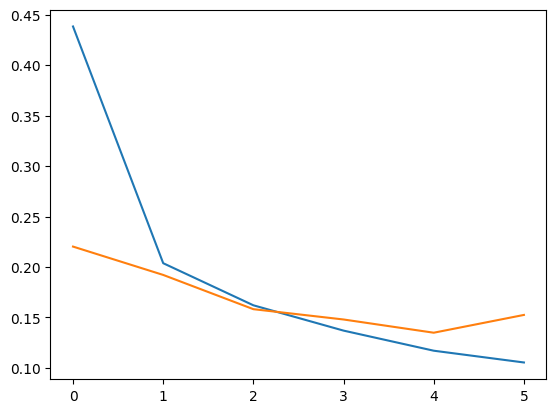

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])